# First Order Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definitions

A [differential equation](https://en.wikipedia.org/wiki/Differential_equation) is an equation involving an unknown function $y(t)$ (with independent variable $t$) and its derivatives $y'$, $y''$, $y'''$, etc. The [order](https://en.wikipedia.org/wiki/Differential_equation#Equation_order) of a differential equation refers to the highest order derivative of the unknown function $y(t)$ appearing in the equation. A differential equation is [linear](https://en.wikipedia.org/wiki/Linear_differential_equation) if it is of the form

$$
a_n(t) y^{(n)} + a_{n_1}(t) y^{(n-1)} + \cdots + a_1(t) y' + a_0(t) y_0 = f(t)
$$

where $a_n, \dots, a_0, f$ are functions of the independent variable $t$ only. For example, the equation

$$
y'' + ty' + y^2 = t
$$

is second order non-linear, and the equation

$$
y' + ty = t^2 
$$

is first order linear. Most differential equations are *impossible to solve* explicitly however we can always use [numerical methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) to approximate solutions. 

## Euler's Method

The simplest numerical method for approximating solutions of differential equations is [Euler's method](https://en.wikipedia.org/wiki/Euler_method). Consider a first order differential equation with an initial condition:

$$
y' = f(y,y) \ , \ \ y(t_0)=y_0
$$

The procedure for Euler's method is as follows:

1. Contruct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$:

    $$
    y = y(t_0) + f(y_0,t_0)(t - t_0)
    $$

    where $y'(t_0) = f(y_0,t_0)$ is the slope of $y(t)$ at $t=t_0$.

2. Use the tangent line to approximate $y(t)$ at a small time step $t_1 = t_0 + h$:
    $$
    y_1 = y_0 + f(y_0,t_0)(t_1 - t_0)
    $$
    where $y_1 \approx y(t_1)$.

3. Construct the tangent line at the point $(t_1,y_1)$ and repeat.

The formula for Euler's method defines a recursive sequence:

$$
y_{n+1} = y_n + f(y_n,t_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(t_0)
$$

where $y_n \approx y(t_n)$ for each $n$. If we choose equally spaced $t$ values then the formula becomes

$$
y_{n+1} = y_n + f(y_n,t_n)h \ \ , \ \ y_0 = y(t_0) \ , \ \ t_n = t_0 + nh 
$$

with time step $h = t_{n+1} - t_n$.

Note two very important things about Euler's method and numerical methods in general:

* A smaller time step $h$ reduces the error in the approximation.
* A smaller time step $h$ requires more computations!

## Implementation

Let's write a function called `odeEuler` which takes 3 input parameters `f`, `y0` and `t` where:

* `f` is a function of 2 variables which represents the right side of a first order differential equation `y' = f(y,t)`
* `t` is a 1D NumPy array of $t$ values where we are approximating $y$ values
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the entry at index 0 of the array `t`

The function `odeEuler` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$ of the differential equation

$$
y' = f(y,t) \ , \ \ y(t_0)=y_0
$$

by Euler's method. Notice that we don't specify a time step value $h$. Instead, the function `odeEuler` takes an array of $t$ values and returns $y$ values approximating the solution $y(t)$ by the formula

$$
y_{n+1} = y_n + f(y_n,t_n)(t_{n+1} - t_n)
$$

In [2]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.
    
    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].
    
    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

## Examples

### Exponential Equation

Let's implement Euler's method to approximate solutions of $y' = y$ for $t \in [0,2]$. We know the solution is $y(t) = e^t$ in this case and so we can compare the approximation by Euler's method to the true solution.

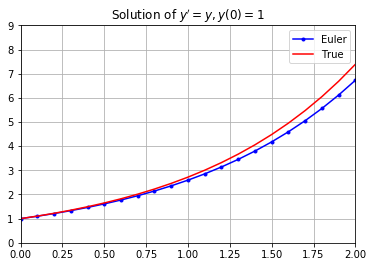

In [3]:
t = np.linspace(0,2,21)
y0 = 1
f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$")
plt.show()

### Non-Linear Equation

Let's plot an approximation of $y'=y^2$ for $y(0)=-1$. We know the solution is

$$
y(t) = \frac{-1}{t+1}
$$

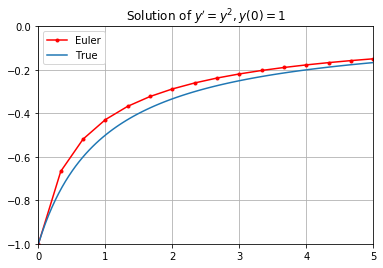

In [4]:
t = np.linspace(0,5,16)
y0 = -1
f = lambda y,t: y**2
y = odeEuler(f,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)
plt.plot(t,y,'r.-',t_true,y_true)
plt.legend(['Euler','True'])
plt.grid(True)
plt.axis([0,5,-1,0])
plt.title("Solution of $y'=y^2 , y(0)=1$")
plt.show()

### Autonomous Equation

Let's do an example where we know that it would be impossible to find the true solution. Let's approximate the solution of $y' = \sin(y^2)$ for each initial condition $y(0)=-3,-2.75,-2.5,...,2.5,2.75$ and plot all the results together.

Note that $y'=0$ when $y=\pm \sqrt{k \pi}$ for $k=0,1,2,3,4,...$. These points are called [equilibrium points](https://en.wikipedia.org/wiki/Equilibrium_point) of the equation and represent steady state (or constant) solutions.

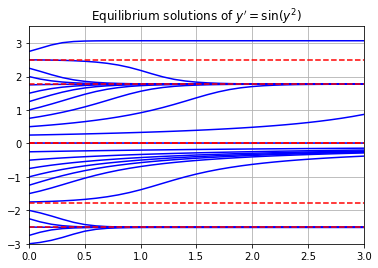

In [5]:
t0 = 0; tf = 3; h = 0.1;

f = lambda y,t: np.sin(y**2)

t = np.arange(t0,tf+h,h)

for y0 in np.arange(-3,3,0.25):
    y = odeEuler(f,y0,t)
    plt.plot(t,y,'b')

for k in range(0,3):
    y_eq = np.sqrt(k*np.pi)
    plt.plot([t0,tf],[y_eq,y_eq],'r--')
    plt.plot([t0,tf],[-y_eq,-y_eq],'r--')

plt.grid(True)
plt.axis([0,3,-3,3.5])
plt.title("Equilibrium solutions of $y'=\sin(y^2)$")
plt.show()

## Slope Fields

*Under construction*

## Exercises

*Under construction*